In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

tf.__version__

'2.8.0'

In [2]:
path_to_file = 'shakespeare.txt'

text = open(path_to_file, 'r').read()

print(text[:500])


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bu


In [3]:
# The unique characters in the file
vocab = sorted(set(text))
print(vocab)
len(vocab)

['\n', ' ', '!', '"', '&', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|']


82

In [4]:
# ## Step 2: Text Processing

# ### Text Vectorization
#
# We know a neural network can't take in the raw string data, we need to assign numbers to each character. Let's create two dictionaries that can go from numeric index to character and character to numeric index.


char_to_ind = {u: i for i, u in enumerate(vocab)}

char_to_ind

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 '&': 4,
 "'": 5,
 '(': 6,
 ')': 7,
 ',': 8,
 '-': 9,
 '.': 10,
 '0': 11,
 '1': 12,
 '2': 13,
 '3': 14,
 '4': 15,
 '5': 16,
 '6': 17,
 '7': 18,
 '8': 19,
 '9': 20,
 ':': 21,
 ';': 22,
 '<': 23,
 '>': 24,
 '?': 25,
 'A': 26,
 'B': 27,
 'C': 28,
 'D': 29,
 'E': 30,
 'F': 31,
 'G': 32,
 'H': 33,
 'I': 34,
 'J': 35,
 'K': 36,
 'L': 37,
 'M': 38,
 'N': 39,
 'O': 40,
 'P': 41,
 'Q': 42,
 'R': 43,
 'S': 44,
 'T': 45,
 'U': 46,
 'V': 47,
 'W': 48,
 'X': 49,
 'Y': 50,
 'Z': 51,
 '[': 52,
 ']': 53,
 '_': 54,
 'a': 55,
 'b': 56,
 'c': 57,
 'd': 58,
 'e': 59,
 'f': 60,
 'g': 61,
 'h': 62,
 'i': 63,
 'j': 64,
 'k': 65,
 'l': 66,
 'm': 67,
 'n': 68,
 'o': 69,
 'p': 70,
 'q': 71,
 'r': 72,
 's': 73,
 't': 74,
 'u': 75,
 'v': 76,
 'w': 77,
 'x': 78,
 'y': 79,
 'z': 80,
 '|': 81}

In [5]:
ind_to_char = np.array(vocab)
ind_to_char

array(['\n', ' ', '!', '"', '&', "'", '(', ')', ',', '-', '.', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '|'], dtype='<U1')

In [6]:
encoded_text = np.array([char_to_ind[c] for c in text])
encoded_text

array([ 0,  1,  1, ..., 50, 59, 73])

In [7]:
# We now have a mapping we can use to go back and forth from characters to numerics.

sample = text[:20]

print(sample)

print(encoded_text[:20])


                   
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
# ## Step 3: Creating Batches
#
# Overall what we are trying to achieve is to have the model predict the next highest probability character given a historical sequence of characters. Its up to us (the user) to choose how long that historic sequence is. Too short a sequence and we don't have enough information (e.g. given the letter "a" , what is the next character?) , too long a sequence and training will take too long and most likely overfit to sequence characters that are irrelevant to characters farther out. While there is no correct sequence length choice, you should consider the text itself, how long normal phrases are in it, and a reasonable idea of what characters/words are relevant to each other.


print(text[:500])

line = "From fairest creatures we desire increase"

len(line)


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bu


41

In [9]:
part_stanza = """From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,"""

len(part_stanza)

131

In [10]:
# ### Training Sequences
#
# The actual text data will be the text sequence shifted one character forward. For example:
#
# Sequence In: "Hello my nam"
# Sequence Out: "ello my name"
#
#
# We can use the `tf.data.Dataset.from_tensor_slices` function to convert a text vector into a stream of character indices.


seq_len = 120

total_num_seq = len(text) // (seq_len + 1)

total_num_seq

8665

In [11]:
# Create Training Sequences
char_dataset = tf.data.Dataset.from_tensor_slices(encoded_text)

for i in char_dataset.take(500):
    print(ind_to_char[i.numpy()])



 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
1


 
 
F
r
o
m
 
f
a
i
r
e
s
t
 
c
r
e
a
t
u
r
e
s
 
w
e
 
d
e
s
i
r
e
 
i
n
c
r
e
a
s
e
,


 
 
T
h
a
t
 
t
h
e
r
e
b
y
 
b
e
a
u
t
y
'
s
 
r
o
s
e
 
m
i
g
h
t
 
n
e
v
e
r
 
d
i
e
,


 
 
B
u
t
 
a
s
 
t
h
e
 
r
i
p
e
r
 
s
h
o
u
l
d
 
b
y
 
t
i
m
e
 
d
e
c
e
a
s
e
,


 
 
H
i
s
 
t
e
n
d
e
r
 
h
e
i
r
 
m
i
g
h
t
 
b
e
a
r
 
h
i
s
 
m
e
m
o
r
y
:


 
 
B
u
t
 
t
h
o
u
 
c
o
n
t
r
a
c
t
e
d
 
t
o
 
t
h
i
n
e
 
o
w
n
 
b
r
i
g
h
t
 
e
y
e
s
,


 
 
F
e
e
d
'
s
t
 
t
h
y
 
l
i
g
h
t
'
s
 
f
l
a
m
e
 
w
i
t
h
 
s
e
l
f
-
s
u
b
s
t
a
n
t
i
a
l
 
f
u
e
l
,


 
 
M
a
k
i
n
g
 
a
 
f
a
m
i
n
e
 
w
h
e
r
e
 
a
b
u
n
d
a
n
c
e
 
l
i
e
s
,


 
 
T
h
y
 
s
e
l
f
 
t
h
y
 
f
o
e
,
 
t
o
 
t
h
y
 
s
w
e
e
t
 
s
e
l
f
 
t
o
o
 
c
r
u
e
l
:


 
 
T
h
o
u
 
t
h
a
t
 
a
r
t
 
n
o
w
 
t
h
e
 
w
o
r
l
d
'
s
 
f
r
e
s
h
 
o
r
n
a
m
e
n
t
,


 
 
A
n
d
 
o
n
l
y
 
h
e
r
a
l
d
 
t
o
 
t
h
e
 
g
a
u
d
y
 
s
p
r
i
n
g
,


 
 
W
i
t
h
i
n
 
t
h
i
n
e
 
o
w
n
 
b
u


In [12]:
# The **batch** method converts these individual character calls into sequences we can feed in as a batch. We use seq_len+1 because of zero indexing. Here is what drop_remainder means:
#
# drop_remainder: (Optional.) A `tf.bool` scalar `tf.Tensor`, representing
#     whether the last batch should be dropped in the case it has fewer than
#     `batch_size` elements; the default behavior is not to drop the smaller
#     batch.
#


sequences = char_dataset.batch(seq_len + 1, drop_remainder=True)


In [13]:
# Now that we have our sequences, we will perform the following steps for each one to create our target text sequences:
#
# 1. Grab the input text sequence
# 2. Assign the target text sequence as the input text sequence shifted by one step forward
# 3. Group them together as a tuple


def create_seq_targets(seq):
    input_txt = seq[:-1]
    target_txt = seq[1:]
    return input_txt, target_txt


dataset = sequences.map(create_seq_targets)

In [14]:
for input_txt, target_txt in dataset.take(1):
    print(input_txt.numpy())
    print(''.join(ind_to_char[input_txt.numpy()]))
    print('\n')
    print(target_txt.numpy())
    # There is an extra whitespace!
    print(''.join(ind_to_char[target_txt.numpy()]))

[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0
  1  1 31 72 69 67  1 60 55 63 72 59 73 74  1 57 72 59 55 74 75 72 59 73
  1 77 59  1 58 59 73 63 72 59  1 63 68 57 72 59 55 73 59  8  0  1  1 45
 62 55 74  1 74 62 59 72 59 56 79  1 56 59 55 75 74 79  5 73  1 72 69 73
 59  1 67 63 61 62 74  1 68 59 76 59 72  1 58 63 59  8  0  1  1 27 75 74]

                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  0  1
  1 31 72 69 67  1 60 55 63 72 59 73 74  1 57 72 59 55 74 75 72 59 73  1
 77 59  1 58 59 73 63 72 59  1 63 68 57 72 59 55 73 59  8  0  1  1 45 62
 55 74  1 74 62 59 72 59 56 79  1 56 59 55 75 74 79  5 73  1 72 69 73 59
  1 67 63 61 62 74  1 68 59 76 59 72  1 58 63 59  8  0  1  1 27 75 74  1]
                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But 


In [15]:
# ### Generating training batches
#
# Now that we have the actual sequences, we will create the batches, we want to shuffle these sequences into a random order, so the model doesn't overfit to any section of the text, but can instead generate characters given any seed text.


# Batch size
batch_size = 128

# Buffer size to shuffle the dataset so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in which it shuffles elements
buffer_size = 10000

dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

dataset

<BatchDataset element_spec=(TensorSpec(shape=(128, 120), dtype=tf.int64, name=None), TensorSpec(shape=(128, 120), dtype=tf.int64, name=None))>

In [16]:
# ## Step 4: Creating the Model

# This is where YOU will create the model. it needs to start with an embedding layer.
#
# The embedding layer will serve as the input layer, which essentially creates a lookup table that maps the numbers indices of each character to a vector with "embedding dim" number of dimensions. As you can imagine, the larger this embedding size, the more complex the training. This is similar to the idea behind word2vec, where words are mapped to some n-dimensional space. Embedding before feeding straight into the LSTM or GRU usually leads to more realisitic results.


# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension. Your choice.
embed_dim = 64

# Number of RNN units. Your choice. YOU MUST EXPERIMENT WITH THIS NUMBER.
rnn_neurons = 1024

# Now let's create a function that easily adapts to different variables as shown above.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, GRU

In [18]:
# ### Setting up Loss Function
#
# For our loss we will use sparse categorical crossentropy, which we can import from Keras. We will also set this as logits=True


from tensorflow.keras.losses import sparse_categorical_crossentropy


# The reason we need to redefine this is to make sure we are using one hot encoding (from_logits=True)
def sparse_cat_loss(y_true, y_pred):
    return sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)


In [19]:
def create_model(vocab_size, embed_dim, rnn_neurons, batch_size):
    # define your model here...
    # don't forget you need an embeddings layer at the beginning
    # and a dense layer the size of the vocabulary at the end to generate distributions

    model = Sequential()
    model.add(Embedding(vocab_size, embed_dim,batch_input_shape=[batch_size, None]))
    model.add(LSTM(rnn_neurons,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'))
    # Final Dense Layer to Predict
    model.add(Dense(vocab_size))
    model.compile(optimizer='adam', loss=sparse_cat_loss, metrics=['accuracy']) 
    return model

In [20]:
#Create the model
model = create_model(
  vocab_size = vocab_size,
  embed_dim=embed_dim,
  rnn_neurons=rnn_neurons,
  batch_size=batch_size)


#Train the model
epochs = 35
model.fit(dataset,epochs=epochs)

Epoch 1/35
67/67 [==============================] - 16s 123ms/step - loss: 3.2557 - accuracy: 0.2241
Epoch 2/35
67/67 [==============================] - 11s 123ms/step - loss: 2.8111 - accuracy: 0.2786
Epoch 3/35
67/67 [==============================] - 10s 126ms/step - loss: 2.3048 - accuracy: 0.3585
Epoch 4/35
67/67 [==============================] - 10s 125ms/step - loss: 2.0743 - accuracy: 0.4080
Epoch 5/35
67/67 [==============================] - 11s 128ms/step - loss: 1.9126 - accuracy: 0.4485
Epoch 6/35
67/67 [==============================] - 10s 134ms/step - loss: 1.7790 - accuracy: 0.4848
Epoch 7/35
67/67 [==============================] - 10s 132ms/step - loss: 1.6679 - accuracy: 0.5144
Epoch 8/35
67/67 [==============================] - 11s 130ms/step - loss: 1.5855 - accuracy: 0.5366
Epoch 9/35
67/67 [==============================] - 10s 132ms/step - loss: 1.5202 - accuracy: 0.5535
Epoch 10/35
67/67 [==============================] - 11s 133ms/step - loss: 1.4671 - accura

In [21]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy
0,3.255684,0.224126
1,2.811103,0.278560
2,2.304814,0.358486
3,2.074301,0.408006
4,1.912637,0.448478


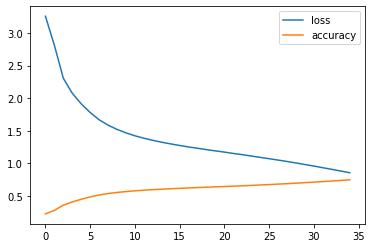

In [22]:
losses[['loss','accuracy']].plot()

Text(0, 0.5, 'metric')

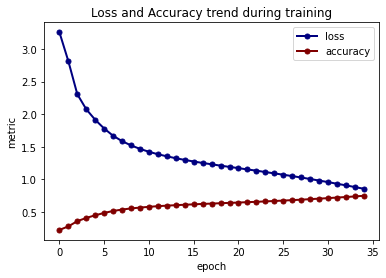

In [23]:
ax = losses.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Loss and Accuracy trend during training')
ax.set_xlabel("epoch")
ax.set_ylabel("metric")

In [24]:
ax.figure.savefig('acc_loss_1024.png')

In [25]:
for input_example_batch, target_example_batch in dataset.take(1):

  # Predict off some random batch
  example_batch_predictions = model(input_example_batch)

  # Display the dimensions of the predictions
  print(example_batch_predictions.shape, " <=== (batch_size, sequence_length, vocab_size)")

example_batch_predictions

(128, 120, 82)  <=== (batch_size, sequence_length, vocab_size)


<tf.Tensor: shape=(128, 120, 82), dtype=float32, numpy=
array([[[ 5.0771520e-02,  4.9719925e+00, -2.5067456e+00, ...,
          6.6945702e-01, -5.3531446e+00, -5.7219677e+00],
        [ 1.2729785e+01,  1.1408561e+01,  1.7823865e+00, ...,
         -1.5041738e+00, -3.6556313e+00, -2.4687054e+00],
        [ 5.4900141e+00,  1.2076597e+01, -4.8968215e+00, ...,
         -7.2337618e+00, -9.6460838e+00, -4.0692291e+00],
        ...,
        [ 6.8824277e+00,  1.0099251e+01,  8.9073539e-01, ...,
         -1.2072359e+00, -4.6167526e+00, -3.2268946e+00],
        [-4.5928717e+00, -9.7304955e-02, -9.6468716e+00, ...,
          7.2117698e-01, -3.8801532e+00, -9.5282860e+00],
        [ 1.6470909e+00,  4.2039865e-01, -5.9257536e+00, ...,
         -5.6388474e-01, -7.3564034e+00, -5.6561689e+00]],

       [[-4.8158121e+00, -1.5201204e-01, -8.8673754e+00, ...,
         -2.2157853e+00, -4.4665475e+00, -9.1810160e+00],
        [ 7.0738149e-01,  4.2211361e+00, -9.3154860e+00, ...,
          1.6678293e+00, -6

In [27]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices

<tf.Tensor: shape=(120, 1), dtype=int64, numpy=
array([[66],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [79],
       [ 1],
       [77],
       [63],
       [71],
       [73],
       [69],
       [68],
       [ 1],
       [74],
       [62],
       [59],
       [ 1],
       [61],
       [72],
       [63],
       [73],
       [63],
       [57],
       [63],
       [55],
       [68],
       [ 1],
       [58],
       [59],
       [ 1],
       [73],
       [79],
       [ 1],
       [67],
       [69],
       [77],
       [59],
       [ 8],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [28],
       [68],
       [58],
       [72],
       [79],
       [ 1],
       [74],
       [69],
       [75],
       [74],
       [ 1],
       [58],
       [59],
       [73],
       [ 1],
       [57],
       [69],
       [69],
       [58],
       [59],
       [63],
       [55],
       [70],
       [74],
       [63],
       [69],
       [68],
       [73],
       [ 8],
   

In [28]:
# Reformat to not be a lists of lists
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()
sampled_indices

array([66,  0,  1,  1,  1, 79,  1, 77, 63, 71, 73, 69, 68,  1, 74, 62, 59,
        1, 61, 72, 63, 73, 63, 57, 63, 55, 68,  1, 58, 59,  1, 73, 79,  1,
       67, 69, 77, 59,  8,  0,  1,  0,  1,  1, 28, 68, 58, 72, 79,  1, 74,
       69, 75, 74,  1, 58, 59, 73,  1, 57, 69, 69, 58, 59, 63, 55, 70, 74,
       63, 69, 68, 73,  8, 66, 68, 59,  1, 68, 69, 74,  1, 63, 63, 70, 74,
       55,  1,  1,  1, 55, 76, 62,  1, 73, 59, 55, 74,  1, 55, 59,  1,  1,
       72, 68, 58,  1, 62,  1, 74, 63, 73, 70, 59, 72, 55, 74, 59,  1, 73,
       69])

In [29]:
print("Given the input seq: \n")
print("".join(ind_to_char[input_example_batch[0]]))
print('\n')
print("Next Char Predictions: \n")
print("".join(ind_to_char[sampled_indices ]))

Given the input seq: 

e:
  My reason the physician to my love,  
  Angry that his prescriptions are not kept
  Hath left me, and I desperate n


Next Char Predictions: 

l
   y wiqson the grisician de sy mowe,
 
  Cndry tout des coodeiaptions,lne not iipta   avh seat ae  rnd h tisperate so


In [30]:
model.save('shakespeare_gen_L_1024.h5')

In [31]:
model = create_model(
      vocab_size = vocab_size,
      embed_dim=embed_dim,
      rnn_neurons=rnn_neurons,
      batch_size=1)

model.load_weights('shakespeare_gen_L_1024.h5')
model.build(tf.TensorShape([1, None]))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (1, None, 64)             5248      
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           4460544   
                                                                 
 dense_1 (Dense)             (1, None, 82)             84050     
                                                                 
Total params: 4,549,842
Trainable params: 4,549,842
Non-trainable params: 0
_________________________________________________________________


In [33]:
def generate_text(model, start_seed,gen_size=100,temp=1.0):
  '''
  model: Trained Model to Generate Text
  start_seed: Intial Seed text in string form
  gen_size: Number of characters to generate

  Basic idea behind this function is to take in some seed text, format it so
  that it is in the correct shape for our network, then loop the sequence as
  we keep adding our own predicted characters. Similar to our work in the RNN
  time series problems.
  '''

  # Number of characters to generate
  num_generate = gen_size

  # Vecotrizing starting seed text
  input_eval = [char_to_ind[s] for s in start_seed]

  # Expand to match batch format shape
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty list to hold resulting generated text
  text_generated = []

  # Temperature effects randomness in our resulting text
  # The term is derived from entropy/thermodynamics.
  # The temperature is used to effect probability of next characters.
  # Higher probability == lesss surprising/ more expected
  # Lower temperature == more surprising / less expected
 
  temperature = temp

  # Here batch size == 1
  model.reset_states()

  for i in range(num_generate):

      # Generate Predictions
      predictions = model(input_eval)

      # Remove the batch shape dimension
      predictions = tf.squeeze(predictions, 0)

      # Use a cateogircal disitribution to select the next character
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # Pass the predicted charracter for the next input
      input_eval = tf.expand_dims([predicted_id], 0)

      # Transform back to character letter
      text_generated.append(ind_to_char[predicted_id])

  return (start_seed + ''.join(text_generated))

In [34]:
print(generate_text(model,"JULIET",gen_size=1000))

JULIETUDADP>PTEHPGEzXVTK<<TNNNHQP8DKQKvZ<UPAAIPGAQKZLAQH<QQURQVLADQVAWGP8QMAQH43HZ4J.HQK]DJOQGQK3TK&zJS<GQQ[]VQLA_H>QFDK82DKQ_QQYIQIRDDODQQKDDKQ"<RQDQQHJQKDETNZ<<OQMLEW>WVQGQ>4Q_GDDHAIQWDCTQLQEIP9J_&KQPWD<DQZWAQP6W<X7<DO<<DQ"QM>"(5QVAQQJQP>8[ (5"QLQHPQLEIUH8VQQAVjLUVEICICEOU(jQKAQDUqVIVAQUAQAQDQNDIzDP.HLIQUM"QLJQDDH"TVQQAIWQA|WVQVK"1QKQDKVDIQODHQJI6N2QIjQPLQLXQHDH<QQ|Q<OHQKDQQDABLNHXDI8PGQ[NQOWV&7QKU_<IQID_Z!QVQJQLPDADQCQJEH&QZQBARQBAC"_A<LLDHIjYQGDBODL(EGAX<NBDD(7QF_D"VQQDQHLzG<Y(&NLQ7DQKDLEGQ"DDQPQUMQXAL<TGQV<NY4<(Q_J[GHX7DLW0|GQK7D<GQU(DGDA[YQ&V(TQQL>GLQCECLAQCWOD_UJLTIEQUI<DWGCTD<DEG"cVDQQEKX]D<"zVQV"<QR<DQQEDGCQGQLLQWLWKL"VDIODQE"4MSO8DZQD4QCIQ7VVPECTIVQUBR>XD(QVQX4]&BEQJOGQ"&QWDQLEW4IQKQWFQKQUAP
DACGEQLO7HLLQCJLTEWHA>B
EQUYTHADPVDKBCUUMRDD>QZQRDQQOIPEGOQBRUDTSDDCTEQEPOW:6_LCLLLJBEQIQQLEXUPATQUJA(YQO<DQLQYDHg_TQ>GCLEIG_IQ<JTZLDJCAQTQIGQHDXDQLLDQQKPQKXQL8QLUTEIDGQKLQUMLQD<GCQOI>QCLLQ_BALDG<>8PG8<DDQTDCFQKXL(!G!DQOGLLQDDQQKLQQRQL<O]YQ"SPEDXTDQXQQLEpQLPJ4QHDKVTV[IDQGKDTEXQOIQRQE7QTUP

In [35]:
print(generate_text(model,"But",gen_size=1000))

But!
                 Enter Clroous wither trues in skelf,
  And I'll be so by thee.
DROMIO OF EPHESUS. I have way thou brokends,
    Sherch, once, and my art and valiant of
    things I will.
  PAROLLES. I do deliver'd thy bewath ingent it humble!
  ARVIRAGUS. Now I small to Antony. Most delieves Dia

        Enter ORLANDO with his villainy on his preserver reputation
    Could every day and ease thy best; they wand
    My daughter's power,  
    Abtorrends, for eightory
    If you'd distire eyes when I am full from this mouth
    Mare fair true kings
    Or would he speaks way it off? Your blood,
    All deports leave up a; 'tis all be we
    Were his froild watch they hope himself awake, and leave him that your belly pleasing span
                                                        Exeunt




ACT IV SCENE 5.
Rousillon. The COUNT'S palace

Enter CYMBELINE and QUEEN
  BRTTRILUS, on our stirring knew.
  Hor. Indeed, let's do thee reserv'd. For myself,
    I should be denied. I shal